<h2> Construindo nosso primeiro modelo preditivo </h2>

**1. Compreensão do negócio**

Prever o tipo do pokemon se baseado em suas características.

**2. Obtenção das bases**

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report

In [103]:
pokemons = pd.read_csv("bases/Pokemon.csv")

**3. Análise Exploratória**

In [3]:
print(f"Qtde de linhas: {len(pokemons)}")
print(f"Qtde de colunas :{len(pokemons.columns)}")
print(f"Shape :{pokemons.shape}")

Qtde de linhas: 800
Qtde de colunas :13
Shape :(800, 13)


In [4]:
pokemons.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


3.1 Explorando o tipo 1

In [5]:
# Visualizando alguns registros
# Note que é uma variável QUALITATIVA (CATEGÓRICA)
pokemons['Type 1'].head(5)

0    Grass
1    Grass
2    Grass
3    Grass
4     Fire
Name: Type 1, dtype: object

In [6]:
# Contagem por registros
pokemons['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [8]:
# Verificando quantos tipos distintos existem?
print('Qtde de tipos 1 únicos existentes: ',len(pokemons['Type 1'].unique()))

Qtde de tipos 1 únicos existentes:  18


In [15]:
agrupamento_tipo = pokemons.groupby("Type 1").count()['#']
agrupamento_tipo

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: #, dtype: int64

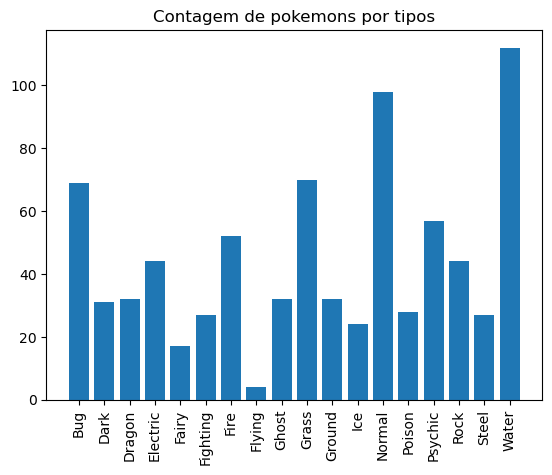

In [18]:
plt.title('Contagem de pokemons por tipos')
plt.bar(agrupamento_tipo.index,agrupamento_tipo)
plt.xticks(rotation=90)
plt.show()

3.2 Explorando o Total

In [19]:
# Note que é uma variável QUANTITATIVA
pokemons['Total'].describe()

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: Total, dtype: float64

In [20]:
pokemons[['Name','Total']].head(5)

,Name,Total
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,525
3,VenusaurMega Venusaur,625
4,Charmander,309


2.3.4 Explorando o HP

In [21]:
# Note que é uma variável QUANTITATIVA
pokemons['HP'].describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64

In [22]:
# Visualizando os últimos cinco registros
pokemons[['Name','HP']].tail(5)

,Name,HP
795,Diancie,50
796,DiancieMega Diancie,50
797,HoopaHoopa Confined,80
798,HoopaHoopa Unbound,80
799,Volcanion,80


2.3.4 Explorando o Attack

In [27]:
pokemons['Attack'].describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

In [28]:
# Visualizando os últimos cinco registros
pokemons[['Name','Attack']].tail(5)

,Name,Attack
795,Diancie,100
796,DiancieMega Diancie,160
797,HoopaHoopa Confined,110
798,HoopaHoopa Unbound,160
799,Volcanion,110


In [104]:
# Limpeza nos dados, eliminando valores ausentes
pokemons_limpo = pokemons.dropna()
print(" === Conjunto de dados limpo === ")
print(f"Qtde de linhas: {len(pokemons_limpo)}")
print(f"Qtde de colunas :{len(pokemons_limpo.columns)}")
print(f"Shape :{pokemons_limpo.shape}")
print("=======================================")
print(" === Conjunto de dados original === ")
print(f"Qtde de linhas: {len(pokemons)}")
print(f"Qtde de colunas :{len(pokemons.columns)}")
print(f"Shape :{pokemons.shape}")

 === Conjunto de dados limpo === 
Qtde de linhas: 414
Qtde de colunas :13
Shape :(414, 13)
 === Conjunto de dados original === 
Qtde de linhas: 800
Qtde de colunas :13
Shape :(800, 13)


**3. Construção do modelo**

In [30]:
pokemons_limpo.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

3.1 Definindo os recursos (X) e a variável rótulo (Y)

In [105]:
recursos = pokemons_limpo[['HP','Attack','Defense','Sp. Atk','Sp. Def']]
rotulo = pokemons_limpo['Type 1']

In [33]:
recursos

,HP,Attack,Defense,Sp. Atk,Sp. Def
0,45,49,49,65,65
1,60,62,63,80,80
2,80,82,83,100,100
3,80,100,123,122,120
6,78,84,78,109,85
...,...,...,...,...,...
795,50,100,150,100,150
796,50,160,110,160,110
797,80,110,60,150,130
798,80,160,60,170,130


In [34]:
rotulo

0        Grass
1        Grass
2        Grass
3        Grass
6         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: Type 1, Length: 414, dtype: object

3.2 Definição do Treino e Teste

In [106]:
X_train, X_test, y_train, y_test = train_test_split(recursos, rotulo, test_size=0.33, random_state=42)

3.3 Treinamento do Modelo

In [107]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print('Modelo treinado')

Modelo treinado


3.4 Inferências (Previsões)

In [108]:
previsoes = clf.predict(X_test)
print('Previsões efetuadas')
print('Qtde de previsões efetuadas',len(previsoes))
previsoes

Previsões efetuadas
Qtde de previsões efetuadas 137


array(['Steel', 'Electric', 'Grass', 'Ghost', 'Grass', 'Dragon', 'Water',
       'Water', 'Ground', 'Steel', 'Dark', 'Dragon', 'Steel', 'Fairy',
       'Dark', 'Rock', 'Electric', 'Psychic', 'Grass', 'Ghost', 'Poison',
       'Water', 'Normal', 'Dark', 'Bug', 'Poison', 'Psychic', 'Grass',
       'Water', 'Bug', 'Grass', 'Fairy', 'Steel', 'Water', 'Bug',
       'Normal', 'Dark', 'Electric', 'Rock', 'Dragon', 'Electric',
       'Steel', 'Water', 'Normal', 'Electric', 'Dragon', 'Electric',
       'Bug', 'Electric', 'Water', 'Rock', 'Steel', 'Ghost', 'Electric',
       'Rock', 'Grass', 'Fire', 'Bug', 'Dragon', 'Bug', 'Poison', 'Grass',
       'Water', 'Dragon', 'Ghost', 'Psychic', 'Normal', 'Ground', 'Water',
       'Water', 'Normal', 'Rock', 'Normal', 'Rock', 'Ground', 'Bug',
       'Dark', 'Water', 'Water', 'Poison', 'Water', 'Rock', 'Water',
       'Fairy', 'Normal', 'Grass', 'Poison', 'Ground', 'Psychic', 'Steel',
       'Bug', 'Ghost', 'Dragon', 'Bug', 'Ground', 'Steel', 'Ghost',
    

In [109]:
X_test

,HP,Attack,Defense,Sp. Atk,Sp. Def
712,125,120,90,170,100
704,79,115,70,125,80
736,86,68,72,109,66
782,54,66,70,44,55
730,62,73,55,56,52
...,...,...,...,...,...
297,70,70,40,60,40
524,110,130,80,70,60
229,70,150,140,65,100
409,95,145,130,120,90


In [115]:
previsoes_df = pd.DataFrame(previsoes,columns=['tipo'])
recursos_previsoes = pd.concat([X_test,previsoes_df.set_axis(X_test.index)],axis=1)
recursos_previsoes

,HP,Attack,Defense,Sp. Atk,Sp. Def,tipo
712,125,120,90,170,100,Steel
704,79,115,70,125,80,Electric
736,86,68,72,109,66,Grass
782,54,66,70,44,55,Ghost
730,62,73,55,56,52,Grass
...,...,...,...,...,...,...
297,70,70,40,60,40,Bug
524,110,130,80,70,60,Normal
229,70,150,140,65,100,Bug
409,95,145,130,120,90,Dragon


Previsão avulsa

In [118]:
# Pokemon_novo
pokemon_novo = [[125,100,80,121,100]]
clf.predict(pokemon_novo)

C:\ProgramData\programa_anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Grass'], dtype=object)

**4. Avaliação do modelo**

In [121]:
target_names = pokemons['Type 1'].unique()
print(classification_report(y_test, previsoes, target_names=target_names))

              precision    recall  f1-score   support

       Grass       0.28      0.25      0.26        20
        Fire       0.00      0.00      0.00         3
       Water       0.20      0.20      0.20        10
         Bug       0.62      0.83      0.71         6
      Normal       0.00      0.00      0.00         1
      Poison       0.00      0.00      0.00         3
    Electric       0.00      0.00      0.00        10
      Ground       0.00      0.00      0.00         1
       Fairy       0.22      0.40      0.29         5
    Fighting       0.10      0.08      0.09        12
     Psychic       0.00      0.00      0.00         7
        Rock       0.00      0.00      0.00         5
       Ghost       0.25      0.21      0.23        14
         Ice       0.00      0.00      0.00         5
      Dragon       0.29      0.33      0.31         6
        Dark       0.12      0.07      0.09        14
       Steel       0.00      0.00      0.00         4
      Flying       0.12    

C:\ProgramData\programa_anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\programa_anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\programa_anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5. Implantação do modelo**